In [7]:
import pandas as pd

CSV_PATH = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

df = pd.read_csv(CSV_PATH)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
passengers = len(df)
survivors = df["Survived"] == 1
total_survivors = len(df[survivors])

#Percentage survivors
survived_percentage = total_survivors / passengers * 100
print(f"Survived {int(survived_percentage)}% survivors {total_survivors}/{passengers} \n")

def GetBySex(sex):
    sex_data = df["Sex"] == sex
    return sex_data

def GetTotalBySex(sex):
    data = GetBySex(sex)
    return len(df[data])

sexs = {"male","female"}

age_mask = df["Age"]
for s in sexs:
    sex_mask = GetBySex(s)
    survived = len(df[sex_mask & survivors])
    age_survived = df[sex_mask & age_mask & survivors]
    total_bysex = len(df[sex_mask])
    mean_age = age_survived["Age"].mean()
    print(f"{s} aboard {GetTotalBySex(s)} survived {survived}/{total_bysex} Mean age {mean_age:.2f}")

print(f"Mean age {age_mask.mean():.2f} Max age {age_mask.max():.2f} Min age {age_mask.min()}")



Survived 38% survivors 342/891 

female aboard 314 survived 233/314 Mean age 28.85
male aboard 577 survived 109/577 Mean age 27.28
Mean age 29.70 Max age 80.00 Min age 0.42


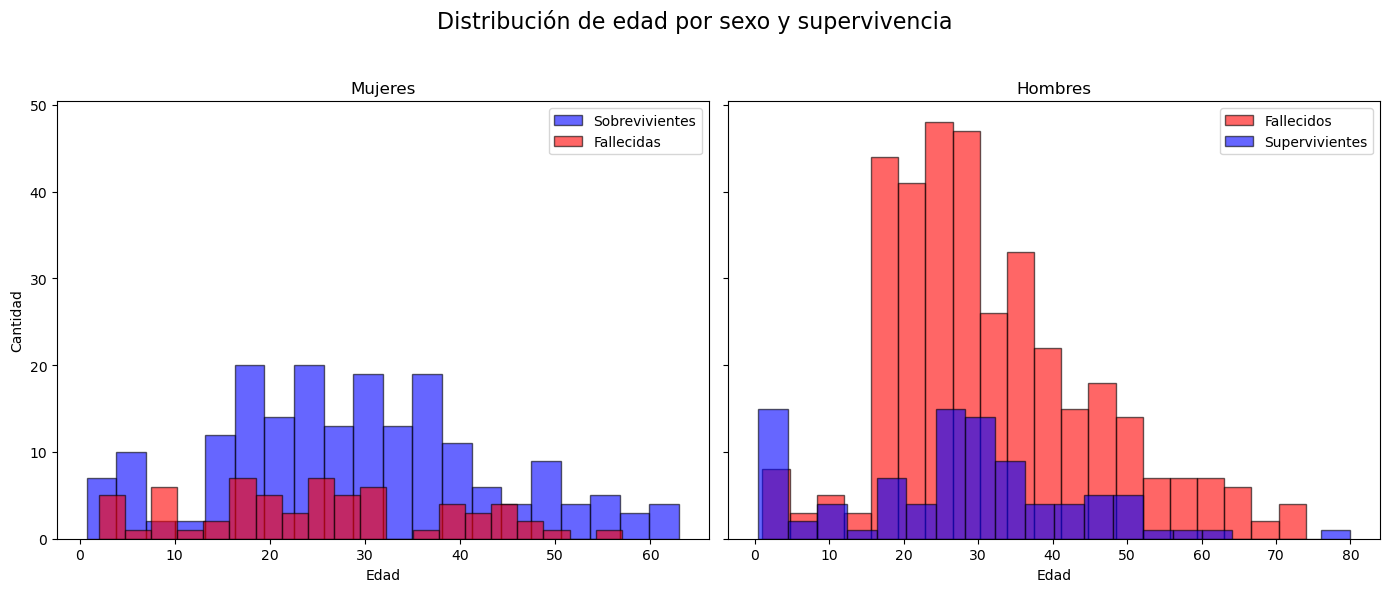

In [ ]:
import matplotlib.pyplot as plt

# Configurar figura con dos subgráficas (una para cada sexo)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Opciones comunes
bins = 20
alpha = 0.6

# Mujeres
axes[0].hist(
    df[(df["Survived"] == 1) & (df["Sex"] == "female")]["Age"],
    bins=bins, alpha=alpha, label="Sobrevivientes", color="blue", edgecolor="black"
)
axes[0].hist(
    df[(df["Survived"] == 0) & (df["Sex"] == "female")]["Age"],
    bins=bins, alpha=alpha, label="Fallecidas", color="red", edgecolor="black"
)
axes[0].set_title("Mujeres")
axes[0].set_xlabel("Edad")
axes[0].set_ylabel("Cantidad")
axes[0].legend()

# Hombres
axes[1].hist(
    df[(df["Survived"] == 0) & (df["Sex"] == "male")]["Age"],
    bins=bins, alpha=alpha, label="Fallecidos", color="red", edgecolor="black"
)
axes[1].hist(
    df[(df["Survived"] == 1) & (df["Sex"] == "male")]["Age"],
    bins=bins, alpha=alpha, label="Supervivientes", color="blue", edgecolor="black"
)

axes[1].set_title("Hombres")
axes[1].set_xlabel("Edad")
axes[1].legend()

# Título general
fig.suptitle("Distribución de edad por sexo y supervivencia", fontsize=16)

plt.    (rect=[0, 0, 1, 0.95])  # Para que el título no se solape
plt.show()
